In [2]:
import pandas as pd
from matplotlib import figure
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv("metadata.csv")
df.describe()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Vertices,AverageSize,DiagonalSize,Cells
count,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2.483000e+03,2.483000e+03,2483.000000
mean,1241.000000,1241.000000,1241.000000,1241.000000,5609.783327,5.735999e+04,2.055363e+05,10691.525977
std,716.924682,716.924682,716.924682,716.924682,9851.159563,2.857743e+06,1.024007e+07,16191.234208
min,0.000000,0.000000,0.000000,0.000000,16.000000,1.682475e-02,7.961316e-02,16.000000
25%,620.500000,620.500000,620.500000,620.500000,489.500000,2.526283e-01,1.116272e+00,924.000000
50%,1241.000000,1241.000000,1241.000000,1241.000000,1826.000000,3.367296e-01,1.354865e+00,3615.000000
75%,1861.500000,1861.500000,1861.500000,1861.500000,6306.500000,4.956336e-01,2.149745e+00,13363.500000
max,2482.000000,2482.000000,2482.000000,2482.000000,98256.000000,1.424005e+08,5.102597e+08,129881.000000


In [4]:
rdf = pd.DataFrame(df["Class"].value_counts())
print(rdf)

                 count
Class                 
Jet                143
Humanoid           142
Car                 89
Insect              66
PlantIndoors        65
...                ...
Monitor             20
Wheel               17
AircraftBuoyant     16
Hat                 15
Sign                15

[69 rows x 1 columns]


C:\Users\Efraim\AppData\Local\Temp\ipykernel_6564\684116069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='count', data=rdf, palette=['#1f77b4', '#ff7f0e'])
C:\Users\Efraim\AppData\Local\Temp\ipykernel_6564\684116069.py:3: UserWarning: 
The palette list has fewer values (2) than needed (69) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Class', y='count', data=rdf, palette=['#1f77b4', '#ff7f0e'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


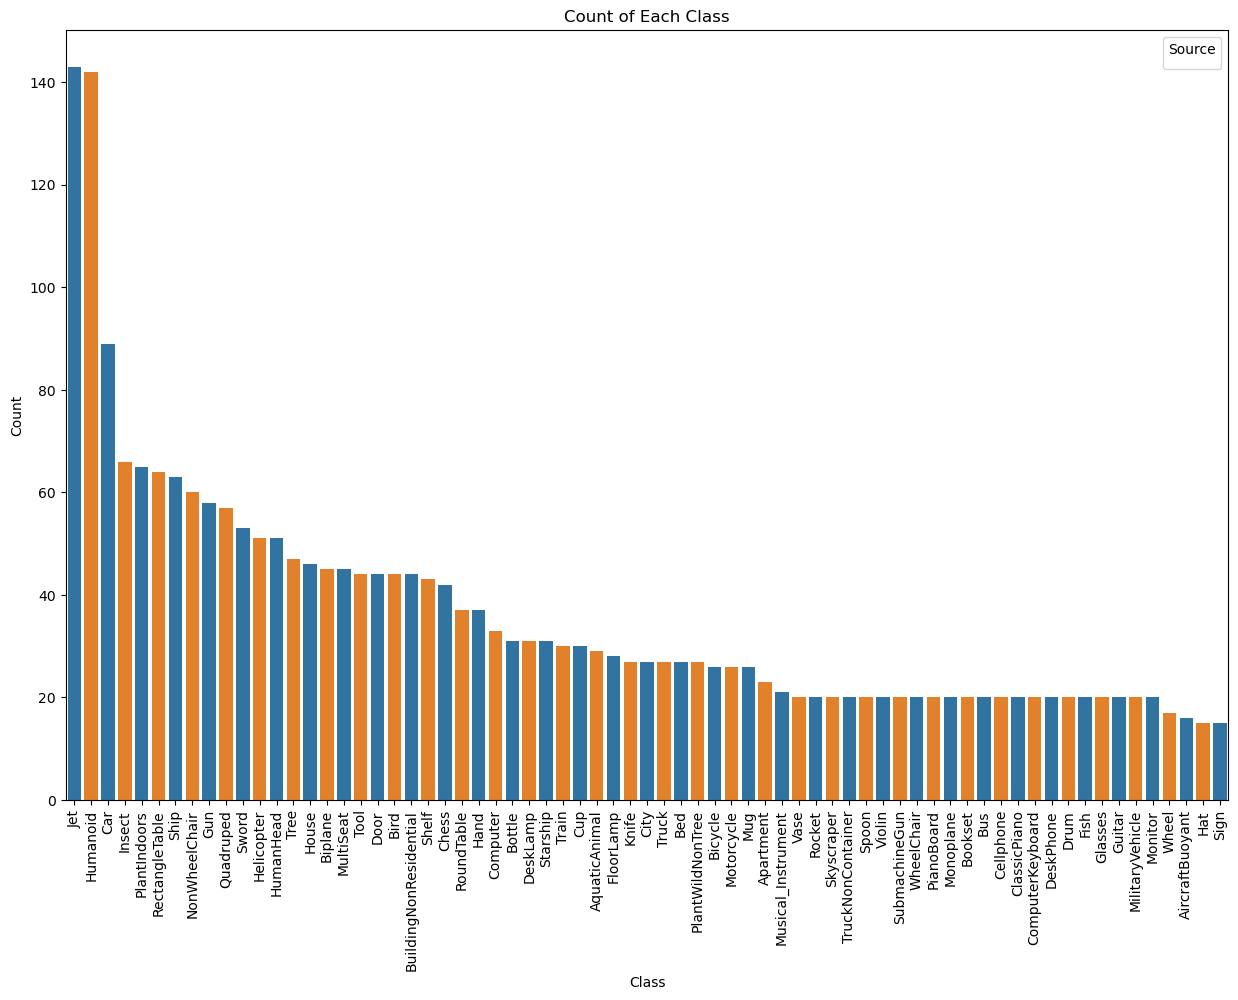

In [5]:
# Create the side-by-side boxplots
plt.figure(figsize=(15, 10))
sns.barplot(x='Class', y='count', data=rdf, palette=['#1f77b4', '#ff7f0e'])
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.legend(title='Source')
plt.show()


C:\Users\Efraim\AppData\Local\Temp\ipykernel_6564\1610183913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Cells', data=df, palette=['#1f77b4', '#ff7f0e'], order=class_order)
C:\Users\Efraim\AppData\Local\Temp\ipykernel_6564\1610183913.py:6: UserWarning: 
The palette list has fewer values (2) than needed (69) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Class', y='Cells', data=df, palette=['#1f77b4', '#ff7f0e'], order=class_order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


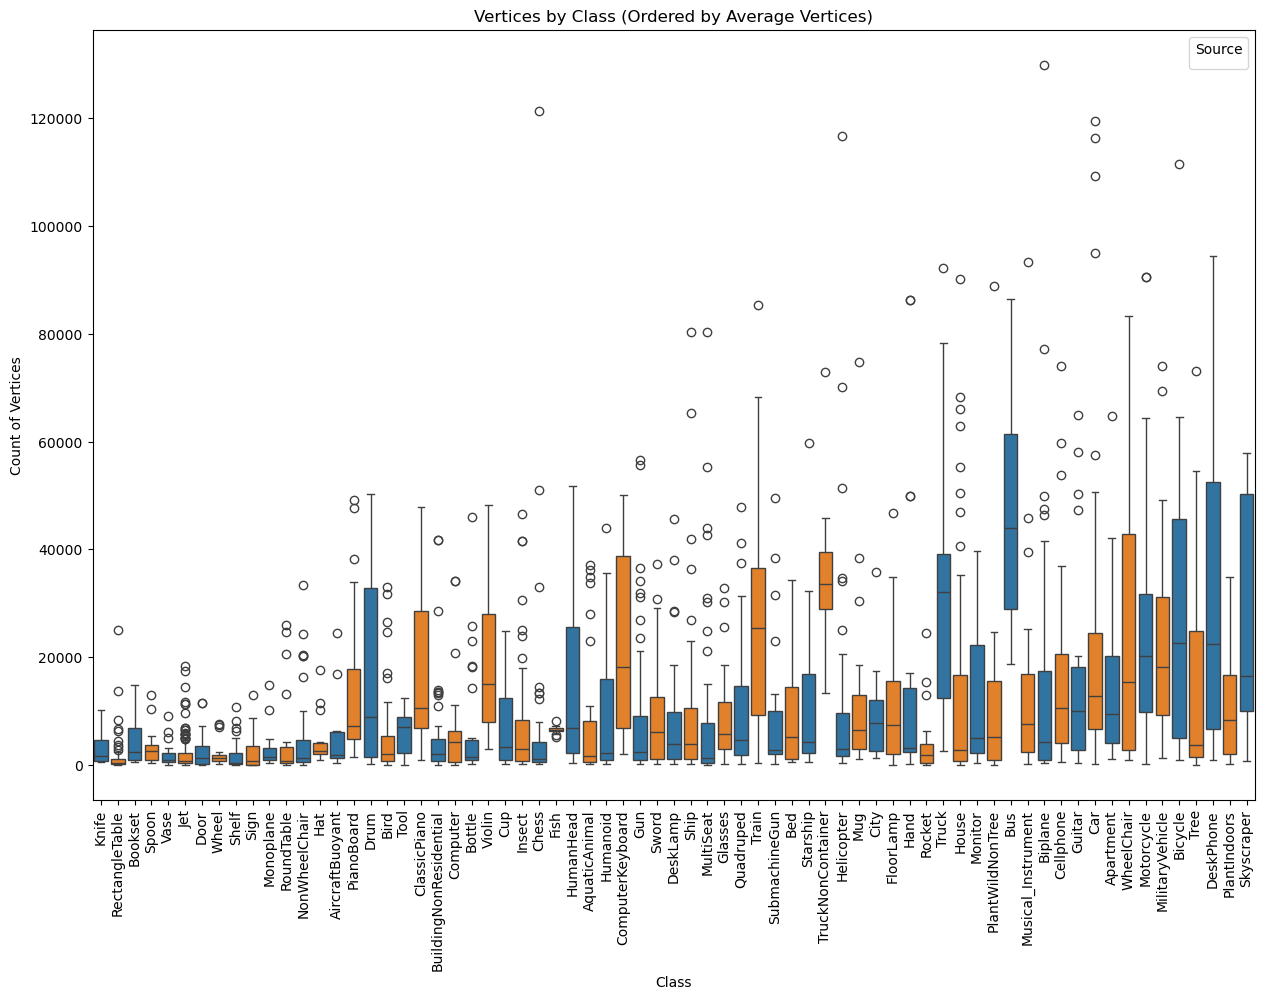

In [11]:


# Calculate the order of classes based on the mean of 'Vertices'
class_order = df.groupby('Class')['Vertices'].mean().sort_values().index

# Create the side-by-side boxplots with ordered classes
plt.figure(figsize=(15, 10))
sns.boxplot(x='Class', y='Cells', data=df, palette=['#1f77b4', '#ff7f0e'], order=class_order)
plt.title('Vertices by Class (Ordered by Average Vertices)')
plt.xlabel('Class')
plt.ylabel('Count of Vertices')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.legend(title='Source')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


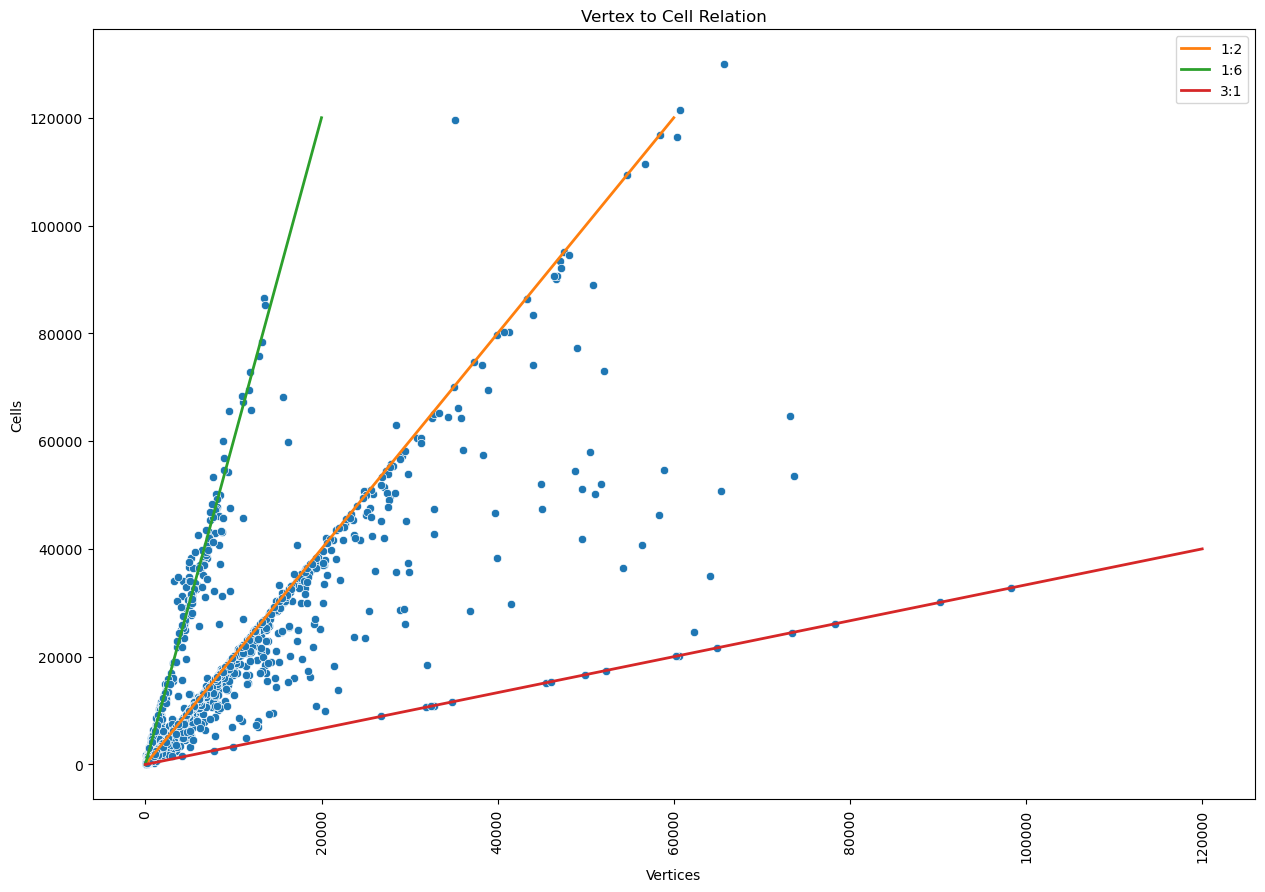

In [80]:
data = pd.DataFrame(data={"Vertices":df["Vertices"],"Cells":df["Cells"]})


plt.figure(figsize=(15, 10))
sns.scatterplot(x='Vertices', y='Cells', data=data)
plt.plot([1, 1], [120000, 120000],linewidth=2)

plt.title('Vertex to Cell Relation')
plt.xlabel('Vertices')
plt.ylabel('Cells')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.legend(title='Source')
plt.plot([0, 60000], [0, 120000], linewidth=2, label="1:2")
plt.plot([0, 20000], [0, 120000], linewidth=2, label="1:6")
plt.plot([0, 120000], [0, 40000], linewidth=2, label="3:1")

plt.legend()
plt.show()

In [34]:
#Evaluation of Diameter Sample Heuristic
from vedo import Mesh, ConvexHull
from tqdm import tqdm
from pathlib import Path
import pandas as pd
import numpy as np

df_manifest = pd.read_csv("./subset_shape_manifest.csv")  # Subset


def get_diameter(mesh:Mesh,cvx:ConvexHull,k=500):
    maxD = 0
    maxP = [None,None]
    if(k==None or len(cvx.vertices)<k):
        subs=cvx.vertices
    else:
        subs = cvx.vertices[np.random.choice(cvx.vertices.shape[0], k, replace=False)]
    for v1 in subs:
        for v2 in cvx.vertices:
            d = np.linalg.norm(v1-v2)
            if d>maxD:
                maxD=d
                maxP = [v1,v2]
    return maxD,maxP        
        
def evaluate_sampling(df,limit=None):
    i = 0
    if(limit==None):
        limit=len(df)
    ground_truth=[]
    sampling= []
    shape_directory = Path("../normshapes")
    exp = pd.DataFrame.sample(df,limit)
    for original_path in tqdm(exp['Path'].apply(Path)):
        if(i>limit):
            break
        try:
            class_name = original_path.parent.name
            print(f"reading shapes {class_name}-{original_path.name}")

            mesh_file = str(shape_directory / class_name / original_path.name)
            mesh = Mesh(mesh_file)
            cvx = ConvexHull(mesh)
            sampling.append(get_diameter(mesh,cvx,k=500)[0])
            ground_truth.append(get_diameter(mesh,cvx,k=None)[0])
        except:
            continue
        i+=1
    rdf = pd.DataFrame.from_dict(data={"sampling":sampling,"ground_truth":ground_truth},orient="columns")
    return rdf

rdf = evaluate_sampling(df_manifest,limit=200)
print(rdf.head())

  0%|          | 0/200 [00:00<?, ?it/s]

reading shapes WheelChair-D00846.obj


  0%|          | 1/200 [00:10<33:52, 10.21s/it]

reading shapes Mug-D00684.obj


  1%|          | 2/200 [02:48<5:21:47, 97.51s/it]

reading shapes Ship-m1466.obj


  2%|▏         | 3/200 [02:54<3:02:59, 55.73s/it]

reading shapes Humanoid-m125.obj


  2%|▏         | 4/200 [03:00<1:57:41, 36.03s/it]

reading shapes Hand-m323.obj


  2%|▎         | 5/200 [03:14<1:31:06, 28.03s/it]

reading shapes Door-m1724.obj


  3%|▎         | 6/200 [07:09<5:18:29, 98.50s/it]

reading shapes Car-m1487.obj


  4%|▎         | 7/200 [07:20<3:44:48, 69.89s/it]

reading shapes Insect-D00662.obj


  4%|▍         | 8/200 [07:22<2:34:37, 48.32s/it]

reading shapes Bicycle-m1473.obj


  4%|▍         | 9/200 [07:31<1:54:15, 35.89s/it]

reading shapes Knife-m726.obj


  5%|▌         | 10/200 [10:07<3:51:03, 72.97s/it]

reading shapes City-m1652.obj


  6%|▌         | 11/200 [10:18<2:49:56, 53.95s/it]

reading shapes Truck-m1576.obj


[vedo.file_io:267] ERROR: in load(), cannot load ..\normshapes\Truck\m1576.obj


reading shapes MultiSeat-D00588.obj


  6%|▋         | 13/200 [10:53<1:55:29, 37.06s/it]

reading shapes NonWheelChair-m808.obj


  7%|▋         | 14/200 [10:56<1:28:02, 28.40s/it]

reading shapes FloorLamp-D00028.obj


  8%|▊         | 15/200 [11:01<1:09:07, 22.42s/it]

reading shapes Humanoid-m138.obj


  8%|▊         | 16/200 [11:17<1:03:09, 20.59s/it]

reading shapes Chess-m1611.obj


  8%|▊         | 17/200 [12:48<2:02:52, 40.29s/it]

reading shapes PlantWildNonTree-m980.obj


  9%|▉         | 18/200 [12:51<1:29:42, 29.57s/it]

reading shapes Musical_Instrument-m644.obj


 10%|▉         | 19/200 [12:54<1:06:08, 21.92s/it]

reading shapes Cup-D00550.obj


 10%|█         | 20/200 [14:04<1:47:40, 35.89s/it]

reading shapes Tool-D01176.obj


 10%|█         | 21/200 [14:23<1:32:16, 30.93s/it]

reading shapes FloorLamp-m620.obj


 11%|█         | 22/200 [14:30<1:11:27, 24.09s/it]

reading shapes Apartment-D00639.obj


 12%|█▏        | 23/200 [14:39<56:59, 19.32s/it]  

reading shapes AircraftBuoyant-m1344.obj


 12%|█▏        | 24/200 [16:01<1:52:10, 38.24s/it]

reading shapes Gun-m650.obj


 12%|█▎        | 25/200 [22:05<6:34:53, 135.39s/it]

reading shapes Monoplane-D00963.obj


 13%|█▎        | 26/200 [22:08<4:37:56, 95.84s/it] 

reading shapes RectangleTable-m917.obj


 14%|█▎        | 27/200 [22:37<3:38:21, 75.73s/it]

reading shapes Glasses-D00630.obj


 14%|█▍        | 28/200 [27:26<6:40:57, 139.87s/it]

reading shapes Truck-D00010.obj


 14%|█▍        | 29/200 [27:30<4:42:38, 99.17s/it] 

reading shapes Knife-m727.obj


 15%|█▌        | 30/200 [30:26<5:46:14, 122.20s/it]

reading shapes Shelf-D00781.obj


 16%|█▌        | 31/200 [42:20<14:03:56, 299.62s/it]

reading shapes Hat-m1627.obj


 16%|█▌        | 32/200 [48:39<15:05:37, 323.44s/it]

reading shapes Glasses-D00816.obj


 16%|█▋        | 33/200 [50:39<12:10:26, 262.43s/it]

reading shapes City-D01173.obj


 17%|█▋        | 34/200 [52:13<9:46:22, 211.94s/it] 

reading shapes Shelf-m863.obj


 18%|█▊        | 35/200 [52:45<7:13:57, 157.81s/it]

reading shapes Quadruped-m104.obj


 18%|█▊        | 36/200 [53:05<5:18:38, 116.57s/it]

reading shapes HumanHead-m365.obj


 18%|█▊        | 37/200 [53:42<4:11:24, 92.55s/it] 

reading shapes Wheel-m738.obj


 19%|█▉        | 38/200 [56:14<4:57:57, 110.36s/it]

reading shapes Sign-m1672.obj


 20%|█▉        | 39/200 [56:59<4:04:05, 90.97s/it] 

reading shapes Skyscraper-D00058.obj


 20%|██        | 40/200 [57:37<3:19:54, 74.97s/it]

reading shapes House-m454.obj


 20%|██        | 41/200 [57:49<2:28:46, 56.14s/it]

reading shapes Sign-m1676.obj


 21%|██        | 42/200 [57:59<1:50:48, 42.08s/it]

reading shapes Ship-m1437.obj


 22%|██▏       | 43/200 [58:22<1:35:25, 36.47s/it]

reading shapes RectangleTable-m895.obj


 22%|██▏       | 44/200 [59:22<1:53:23, 43.61s/it]

reading shapes Bus-D00754.obj


 22%|██▎       | 45/200 [59:32<1:26:23, 33.44s/it]

reading shapes SubmachineGun-D00068.obj


 23%|██▎       | 46/200 [59:38<1:05:06, 25.36s/it]

reading shapes PlantIndoors-m1005.obj


 24%|██▎       | 47/200 [59:40<46:19, 18.17s/it]  

reading shapes MilitaryVehicle-D00971.obj


 24%|██▍       | 48/200 [59:46<36:42, 14.49s/it]

reading shapes Shelf-D00772.obj


 24%|██▍       | 49/200 [1:00:56<1:18:38, 31.25s/it]

reading shapes Spoon-D00157.obj


 25%|██▌       | 50/200 [1:01:05<1:01:06, 24.44s/it]

reading shapes Monoplane-D00098.obj


 26%|██▌       | 51/200 [1:01:19<53:10, 21.41s/it]  

reading shapes Mug-D00705.obj


 26%|██▌       | 52/200 [1:02:24<1:25:00, 34.46s/it]

reading shapes DeskLamp-m604.obj


 26%|██▋       | 53/200 [1:02:39<1:10:30, 28.78s/it]

reading shapes Bed-D00121.obj


 27%|██▋       | 54/200 [1:02:45<53:12, 21.87s/it]  

reading shapes House-m430.obj


 28%|██▊       | 55/200 [1:02:52<42:00, 17.38s/it]

reading shapes Sword-m716.obj


 28%|██▊       | 56/200 [1:03:59<1:17:06, 32.13s/it]

reading shapes Ship-m1468.obj


 28%|██▊       | 57/200 [1:04:14<1:04:54, 27.23s/it]

reading shapes Helicopter-m1315.obj


 29%|██▉       | 58/200 [1:04:29<55:46, 23.57s/it]  

reading shapes Quadruped-m100.obj


 30%|██▉       | 59/200 [1:04:43<48:17, 20.55s/it]

reading shapes City-D01010.obj


 30%|███       | 60/200 [1:04:56<42:26, 18.19s/it]

reading shapes Motorcycle-D00342.obj


 30%|███       | 61/200 [1:04:58<31:03, 13.41s/it]

reading shapes RoundTable-D00827.obj


 31%|███       | 62/200 [1:06:47<1:37:14, 42.28s/it]

reading shapes SubmachineGun-D00733.obj


 32%|███▏      | 63/200 [1:06:52<1:10:49, 31.02s/it]

reading shapes RoundTable-m924.obj


 32%|███▏      | 64/200 [1:08:44<2:04:54, 55.10s/it]

reading shapes Vase-m545.obj


 32%|███▎      | 65/200 [1:09:10<1:44:53, 46.62s/it]

reading shapes BuildingNonResidential-m396.obj


 33%|███▎      | 66/200 [1:09:18<1:18:10, 35.00s/it]

reading shapes Tool-D01154.obj


 34%|███▎      | 67/200 [1:09:51<1:16:12, 34.38s/it]

reading shapes Spoon-D00674.obj


 34%|███▍      | 68/200 [1:10:59<1:37:47, 44.45s/it]

reading shapes Hat-m1631.obj


[vedo.file_io:267] ERROR: in load(), cannot load ..\normshapes\Hat\m1631.obj


reading shapes Monoplane-D00925.obj


 35%|███▌      | 70/200 [1:11:11<57:40, 26.62s/it]  

reading shapes Drum-D00980.obj


 36%|███▌      | 71/200 [1:11:16<45:57, 21.38s/it]

reading shapes Bottle-D00123.obj


 36%|███▌      | 72/200 [1:14:10<2:10:24, 61.13s/it]

reading shapes PlantIndoors-m1003.obj


 36%|███▋      | 73/200 [1:14:11<1:34:51, 44.81s/it]

reading shapes Monitor-D00978.obj


 37%|███▋      | 74/200 [1:14:23<1:14:56, 35.68s/it]

reading shapes Shelf-D00631.obj


 38%|███▊      | 75/200 [1:14:24<53:52, 25.86s/it]  

reading shapes Sign-m1674.obj


 38%|███▊      | 76/200 [1:15:24<1:13:37, 35.63s/it]

reading shapes Fish-D00251.obj


 38%|███▊      | 77/200 [1:15:30<55:17, 26.97s/it]  

reading shapes City-D01192.obj
reading shapes Bed-D00031.obj


[vedo.file_io:267] ERROR: in load(), cannot load ..\normshapes\City\D01192.obj
 40%|███▉      | 79/200 [1:15:59<43:02, 21.34s/it]

reading shapes Bookset-D01009.obj


 40%|████      | 80/200 [1:16:17<41:01, 20.51s/it]

reading shapes Starship-m1353.obj


 40%|████      | 81/200 [1:16:23<32:59, 16.64s/it]

reading shapes DeskLamp-m608.obj


 41%|████      | 82/200 [1:16:55<40:50, 20.77s/it]

reading shapes Cellphone-D00079.obj


 42%|████▏     | 83/200 [1:17:36<51:58, 26.65s/it]

reading shapes Jet-m1268.obj


 42%|████▏     | 84/200 [1:18:10<55:12, 28.56s/it]

reading shapes Fish-D00022.obj


 42%|████▎     | 85/200 [1:18:17<42:46, 22.32s/it]

reading shapes Vase-m541.obj


 43%|████▎     | 86/200 [1:21:16<2:09:29, 68.15s/it]

reading shapes Musical_Instrument-m627.obj


 44%|████▍     | 88/200 [1:21:55<1:18:16, 41.93s/it]

reading shapes Car-m1556.obj
reading shapes Spoon-D00144.obj


 44%|████▍     | 89/200 [1:26:40<3:31:13, 114.17s/it]

reading shapes Humanoid-m136.obj


 45%|████▌     | 90/200 [1:26:51<2:33:14, 83.59s/it] 

reading shapes PlantIndoors-m1011.obj


 46%|████▌     | 91/200 [1:26:52<1:47:02, 58.93s/it]

reading shapes Jet-m1282.obj


 46%|████▌     | 92/200 [1:27:02<1:19:23, 44.11s/it]

reading shapes Mug-D00685.obj


 46%|████▋     | 93/200 [1:27:21<1:05:12, 36.56s/it]

reading shapes WheelChair-D00628.obj


 47%|████▋     | 94/200 [1:27:24<47:12, 26.72s/it]  

reading shapes Cellphone-D00997.obj


 48%|████▊     | 95/200 [1:29:11<1:28:55, 50.82s/it]

reading shapes House-m461.obj


 48%|████▊     | 96/200 [1:29:19<1:05:34, 37.83s/it]

reading shapes Knife-D01175.obj


 48%|████▊     | 97/200 [1:30:38<1:26:17, 50.27s/it]

reading shapes HumanHead-m364.obj


 49%|████▉     | 98/200 [1:31:19<1:20:29, 47.35s/it]

reading shapes Gun-D00972.obj


 50%|████▉     | 99/200 [1:31:33<1:02:56, 37.39s/it]

reading shapes Apartment-D00496.obj


 50%|█████     | 100/200 [1:31:40<47:24, 28.45s/it] 

reading shapes Motorcycle-m1479.obj


 50%|█████     | 101/200 [1:31:43<33:58, 20.59s/it]

reading shapes SubmachineGun-D00489.obj


 51%|█████     | 102/200 [1:31:56<30:01, 18.38s/it]

reading shapes Truck-D00518.obj


 52%|█████▏    | 103/200 [1:32:06<25:34, 15.82s/it]

reading shapes MilitaryVehicle-D00611.obj


 52%|█████▏    | 104/200 [1:32:18<23:47, 14.87s/it]

reading shapes Bird-m34.obj


 52%|█████▎    | 105/200 [1:32:22<18:08, 11.46s/it]

reading shapes Rocket-D00975.obj


 53%|█████▎    | 106/200 [1:32:30<16:08, 10.30s/it]

reading shapes Mug-m506.obj


 54%|█████▎    | 107/200 [1:32:49<20:15, 13.07s/it]

reading shapes PlantIndoors-m1015.obj


 54%|█████▍    | 108/200 [1:33:05<21:19, 13.91s/it]

reading shapes Rocket-D00942.obj


 55%|█████▍    | 109/200 [1:33:08<16:01, 10.56s/it]

reading shapes Car-D00299.obj


 55%|█████▌    | 110/200 [1:33:14<13:59,  9.33s/it]

reading shapes Ship-D00647.obj


 56%|█████▌    | 111/200 [1:33:29<16:06, 10.86s/it]

reading shapes Gun-D00153.obj


 56%|█████▌    | 112/200 [1:34:23<35:07, 23.95s/it]

reading shapes Apartment-D00921.obj


 56%|█████▋    | 113/200 [1:34:28<26:24, 18.22s/it]

reading shapes Sword-D00484.obj


 57%|█████▋    | 114/200 [1:34:39<23:15, 16.22s/it]

reading shapes Bus-D00264.obj


 57%|█████▊    | 115/200 [1:34:53<21:58, 15.51s/it]

reading shapes PlantWildNonTree-m977.obj


 58%|█████▊    | 116/200 [1:34:54<15:29, 11.07s/it]

reading shapes Bottle-m488.obj


 58%|█████▊    | 117/200 [1:40:13<2:23:16, 103.58s/it]

reading shapes ComputerKeyboard-D00676.obj


 59%|█████▉    | 118/200 [1:41:38<2:13:39, 97.79s/it] 

reading shapes Starship-m1372.obj


 60%|█████▉    | 119/200 [1:41:45<1:35:22, 70.65s/it]

reading shapes AquaticAnimal-m72.obj


 60%|██████    | 120/200 [1:41:46<1:06:30, 49.89s/it]

reading shapes Quadruped-m89.obj


 60%|██████    | 121/200 [1:41:50<47:11, 35.84s/it]  

reading shapes RectangleTable-m896.obj


 61%|██████    | 122/200 [1:42:46<54:38, 42.03s/it]

reading shapes TruckNonContainer-D00055.obj


 62%|██████▏   | 123/200 [1:42:54<40:49, 31.81s/it]

reading shapes Biplane-D00276.obj


 62%|██████▏   | 124/200 [1:43:12<35:11, 27.79s/it]

reading shapes FloorLamp-D00211.obj


 62%|██████▎   | 125/200 [1:43:14<24:46, 19.82s/it]

reading shapes Tree-m1096.obj


 63%|██████▎   | 126/200 [1:43:34<24:29, 19.85s/it]

reading shapes Gun-m676.obj


 64%|██████▎   | 127/200 [1:44:06<28:50, 23.70s/it]

reading shapes DeskPhone-D00486.obj


 64%|██████▍   | 128/200 [1:46:16<1:06:45, 55.63s/it]

reading shapes PianoBoard-D00122.obj


[vedo.file_io:267] ERROR: in load(), cannot load ..\normshapes\PianoBoard\D00122.obj


reading shapes Shelf-D00592.obj


 65%|██████▌   | 130/200 [1:47:25<53:20, 45.72s/it]  

reading shapes HumanHead-D00488.obj


 66%|██████▌   | 131/200 [1:47:42<44:36, 38.78s/it]

reading shapes ComputerKeyboard-D00420.obj


 66%|██████▌   | 132/200 [1:48:11<40:53, 36.08s/it]

reading shapes Monoplane-D00688.obj


 66%|██████▋   | 133/200 [1:48:14<30:19, 27.16s/it]

reading shapes City-m1654.obj


 67%|██████▋   | 134/200 [1:48:18<22:44, 20.68s/it]

reading shapes Bed-D00735.obj


 68%|██████▊   | 135/200 [1:49:26<37:04, 34.22s/it]

reading shapes Cup-m500.obj


 68%|██████▊   | 136/200 [1:52:32<1:23:28, 78.26s/it]

reading shapes Helicopter-m1333.obj


 68%|██████▊   | 137/200 [1:53:42<1:19:32, 75.75s/it]

reading shapes Computer-m1776.obj


 69%|██████▉   | 138/200 [1:53:58<59:52, 57.95s/it]  

reading shapes Fish-D00748.obj


 70%|██████▉   | 139/200 [1:54:01<42:34, 41.88s/it]

reading shapes Chess-m1593.obj


 70%|███████   | 140/200 [1:54:03<29:55, 29.92s/it]

reading shapes Door-m1713.obj


 70%|███████   | 141/200 [1:54:20<25:32, 25.97s/it]

reading shapes Vase-m534.obj


 71%|███████   | 142/200 [1:54:50<26:20, 27.25s/it]

reading shapes NonWheelChair-D00914.obj


 72%|███████▏  | 143/200 [1:55:01<21:23, 22.52s/it]

reading shapes Drum-D00551.obj


 72%|███████▏  | 144/200 [1:55:25<21:18, 22.83s/it]

reading shapes Sign-m1679.obj


 72%|███████▎  | 145/200 [1:55:49<21:21, 23.31s/it]

reading shapes Cup-D00638.obj


 73%|███████▎  | 146/200 [1:56:27<24:59, 27.77s/it]

reading shapes Wheel-m743.obj


 74%|███████▎  | 147/200 [2:08:34<3:29:29, 237.17s/it]

reading shapes MultiSeat-D00237.obj


 74%|███████▍  | 148/200 [2:09:21<2:36:07, 180.15s/it]

reading shapes DeskPhone-D00897.obj


 74%|███████▍  | 149/200 [2:09:36<1:51:11, 130.82s/it]

reading shapes House-D00901.obj


 75%|███████▌  | 150/200 [2:09:42<1:17:44, 93.28s/it] 

reading shapes RectangleTable-m908.obj


 76%|███████▌  | 151/200 [2:09:56<56:47, 69.55s/it]  

reading shapes DeskLamp-D00693.obj


 76%|███████▌  | 152/200 [2:11:10<56:37, 70.79s/it]

reading shapes Insect-m2.obj


 76%|███████▋  | 153/200 [2:11:13<39:37, 50.59s/it]

reading shapes Bus-D00084.obj


 77%|███████▋  | 154/200 [2:11:14<27:12, 35.49s/it]

reading shapes Jet-m1173.obj


 78%|███████▊  | 155/200 [2:11:21<20:18, 27.09s/it]

reading shapes Tool-m1110.obj


 78%|███████▊  | 156/200 [2:12:07<23:57, 32.67s/it]

reading shapes Fish-D00398.obj


 78%|███████▊  | 157/200 [2:12:14<18:00, 25.12s/it]

reading shapes Bottle-D00892.obj


 79%|███████▉  | 158/200 [2:13:22<26:31, 37.88s/it]

reading shapes Fish-D00950.obj


 80%|███████▉  | 159/200 [2:13:25<18:39, 27.32s/it]

reading shapes Sword-m692.obj


 80%|████████  | 160/200 [2:14:04<20:35, 30.89s/it]

reading shapes DeskPhone-D00829.obj


 80%|████████  | 161/200 [2:15:04<25:51, 39.79s/it]

reading shapes Sword-m717.obj


 81%|████████  | 162/200 [2:15:35<23:32, 37.16s/it]

reading shapes RoundTable-m923.obj


 82%|████████▏ | 163/200 [2:18:57<53:15, 86.36s/it]

reading shapes Violin-D00743.obj


 82%|████████▏ | 164/200 [2:19:39<43:53, 73.15s/it]

reading shapes Hand-m327.obj


 82%|████████▎ | 165/200 [2:19:58<33:08, 56.82s/it]

reading shapes Glasses-D00225.obj


 83%|████████▎ | 166/200 [2:20:15<25:34, 45.13s/it]

reading shapes TruckNonContainer-D00267.obj


 84%|████████▎ | 167/200 [2:20:24<18:42, 34.02s/it]

reading shapes Spoon-D00683.obj


 84%|████████▍ | 168/200 [2:20:24<12:50, 24.08s/it]

reading shapes Hat-m1639.obj


 84%|████████▍ | 169/200 [2:20:30<09:37, 18.62s/it]

reading shapes PlantIndoors-m996.obj


 85%|████████▌ | 170/200 [2:20:33<06:55, 13.84s/it]

reading shapes Mug-D00427.obj


 86%|████████▌ | 171/200 [2:21:01<08:46, 18.17s/it]

reading shapes PlantIndoors-D00379.obj


 86%|████████▌ | 172/200 [2:21:02<06:04, 13.01s/it]

reading shapes Hat-m1628.obj


 86%|████████▋ | 173/200 [2:22:47<18:17, 40.66s/it]

reading shapes BuildingNonResidential-m383.obj


 87%|████████▋ | 174/200 [2:22:52<12:51, 29.69s/it]

reading shapes Insect-D00855.obj


 88%|████████▊ | 175/200 [2:23:03<10:03, 24.15s/it]

reading shapes AquaticAnimal-m73.obj


 88%|████████▊ | 176/200 [2:23:10<07:41, 19.22s/it]

reading shapes PlantWildNonTree-m963.obj


 88%|████████▊ | 177/200 [2:23:12<05:19, 13.91s/it]

reading shapes MultiSeat-D00985.obj


 89%|████████▉ | 178/200 [2:24:37<12:53, 35.16s/it]

reading shapes RoundTable-D00194.obj


 90%|████████▉ | 179/200 [2:27:04<24:03, 68.72s/it]

reading shapes NonWheelChair-D00101.obj


 90%|█████████ | 180/200 [2:27:27<18:23, 55.20s/it]

reading shapes Bookset-D01146.obj


 90%|█████████ | 181/200 [2:30:51<31:35, 99.79s/it]

reading shapes Vase-m539.obj


 91%|█████████ | 182/200 [2:32:57<32:14, 107.48s/it]

reading shapes Insect-m16.obj


 92%|█████████▏| 183/200 [2:33:02<21:46, 76.87s/it] 

reading shapes Bus-D00114.obj


 92%|█████████▏| 184/200 [2:33:35<16:58, 63.67s/it]

reading shapes Guitar-D00076.obj


 92%|█████████▎| 185/200 [2:33:48<12:06, 48.41s/it]

reading shapes FloorLamp-D00388.obj


 93%|█████████▎| 186/200 [2:35:23<14:34, 62.48s/it]

reading shapes Jet-m1274.obj


 94%|█████████▎| 187/200 [2:36:04<12:06, 55.92s/it]

reading shapes Starship-m1380.obj


 94%|█████████▍| 188/200 [2:36:09<08:08, 40.73s/it]

reading shapes Door-D01194.obj


 94%|█████████▍| 189/200 [2:53:42<1:03:09, 344.47s/it]

reading shapes Bicycle-D00931.obj


 95%|█████████▌| 190/200 [2:53:52<40:39, 243.96s/it]  

reading shapes Motorcycle-m1481.obj


 96%|█████████▌| 191/200 [2:53:58<25:55, 172.80s/it]

reading shapes Helicopter-m1321.obj


 96%|█████████▌| 192/200 [2:54:02<16:15, 121.98s/it]

reading shapes AircraftBuoyant-m1341.obj


 96%|█████████▋| 193/200 [2:56:57<16:06, 138.09s/it]

reading shapes Vase-m532.obj


 97%|█████████▋| 194/200 [2:57:59<11:31, 115.25s/it]

reading shapes ClassicPiano-D00005.obj


 98%|█████████▊| 195/200 [2:58:39<07:42, 92.46s/it] 

reading shapes Chess-D01080.obj


 98%|█████████▊| 196/200 [2:59:11<04:57, 74.49s/it]

reading shapes Bed-D00538.obj


 98%|█████████▊| 197/200 [2:59:16<02:40, 53.50s/it]

reading shapes Starship-m1361.obj


 99%|█████████▉| 198/200 [3:00:22<01:54, 57.22s/it]

reading shapes Tree-D00096.obj


100%|█████████▉| 199/200 [3:00:25<00:41, 41.02s/it]

reading shapes Skyscraper-D00729.obj


100%|██████████| 200/200 [3:00:44<00:00, 54.22s/it]


   sampling  ground_truth
0  1.029529      1.029529
1  1.075581      1.077532
2  1.001149      1.001149
3  1.003795      1.003795
4  1.005465      1.006086


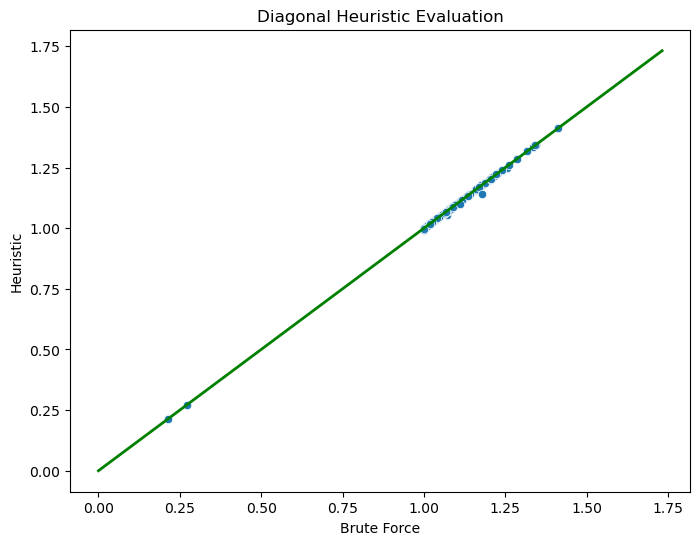

In [36]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ground_truth', y='sampling', data=rdf)
plt.title('Diagonal Heuristic Evaluation')
plt.xlabel('Brute Force')
plt.ylabel('Heuristic')
plt.plot([0, np.sqrt(3)], [0, np.sqrt(3)], linewidth=2, label="expected",color="green")


In [28]:
dfmanifest = pd.read_csv("shape_manifest.csv")
dfmanifest["Path"]=dfmanifest["Path"].apply(func=(lambda x: x.replace("\\","/")))
df["Path"]=df["Path"].apply(func=(lambda x: x.replace("\\","/")))
df_sub = df[["Vertices","Path","Cells"]]


In [ ]:
failed_df = dfmanifest[dfmanifest["ReturnCode"]!=0]
df_sub = df[["Vertices","Path","Cells"]]
failed_meta = failed_df.set_index("Path").join(df_sub.set_index("Path"))
failed_meta["Color"]=["Red"]*len(failed_meta)



                                     ReturnCode  Vertices  Cells Color
Path                                                                  
../shapes/AircraftBuoyant/m1347.obj         -11      3055   6274   Red
../shapes/Biplane/m1125.obj                 -11       434    656   Red
../shapes/Bird/m49.obj                      -11      2329   4364   Red
../shapes/Bookset/D01078.obj                -11      1203   6861   Red
../shapes/Bookset/D01109.obj                -11      1203   6861   Red


In [48]:
other_data = pd.DataFrame(data={"Vertices":df["Vertices"],"Cells":df["Cells"],"Path":df["Path"]})
other_data.set_index("Path")
joined_data = failed_meta.merge(other_data,on=["Path","Cells","Vertices"],how="right")

joined_data.loc[pd.isna(joined_data['Color']),'Color'] = "Blue"
print(joined_data.head())

                                  Path  ReturnCode  Vertices  Cells Color
0  ../shapes/AircraftBuoyant/m1337.obj         NaN       201    340  Blue
1  ../shapes/AircraftBuoyant/m1338.obj         NaN      8761  16960  Blue
2  ../shapes/AircraftBuoyant/m1339.obj         NaN      1878   6173  Blue
3  ../shapes/AircraftBuoyant/m1340.obj         NaN       778   1457  Blue
4  ../shapes/AircraftBuoyant/m1341.obj         NaN       425    824  Blue


C:\Users\Efraim\AppData\Local\Temp\ipykernel_14936\124355404.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Vertices', y='Cells', data=joined_data[joined_data['Color'] == 'Blue'],
C:\Users\Efraim\AppData\Local\Temp\ipykernel_14936\124355404.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Vertices', y='Cells', data=joined_data[joined_data['Color'] == 'Red'],


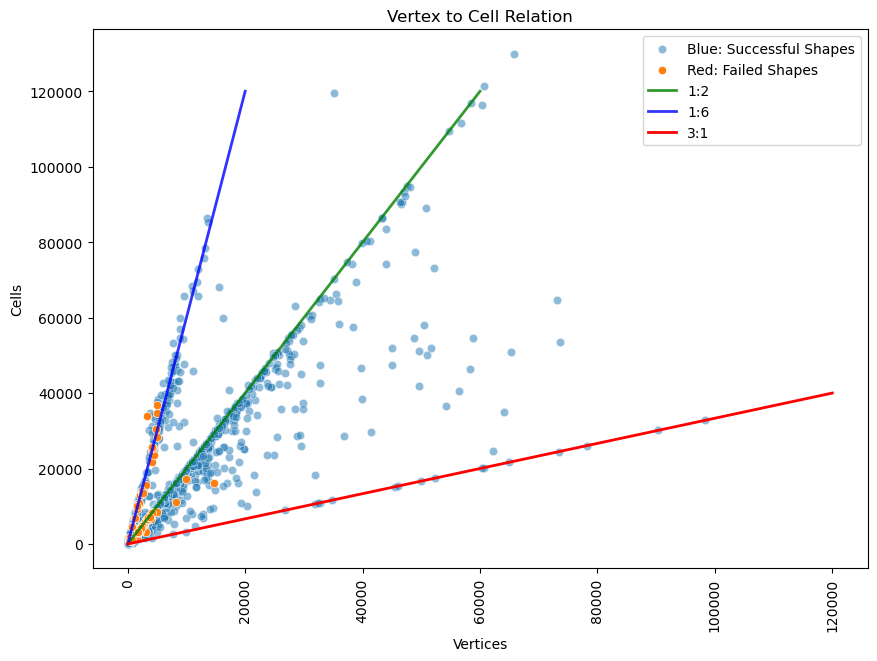

In [63]:


plt.figure(figsize=(10, 7))
# Plot points with Color='Blue' with transparency
sns.scatterplot(x='Vertices', y='Cells', data=joined_data[joined_data['Color'] == 'Blue'], 
                 palette={'Blue': 'blue', 'Red': 'red'}, alpha=0.5, label="Blue: Successful Shapes")

# Plot points with Color='Red' without transparency
sns.scatterplot(x='Vertices', y='Cells', data=joined_data[joined_data['Color'] == 'Red'], 
                 palette={'Blue': 'blue', 'Red': 'red'}, label="Red: Failed Shapes")



plt.title('Vertex to Cell Relation')
plt.xlabel('Vertices')
plt.ylabel('Cells')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.legend(title='Source')
plt.plot([0, 60000], [0, 120000], linewidth=2, label="1:2", color="green", alpha=0.8)
plt.plot([0, 20000], [0, 120000], linewidth=2, label="1:6", color ="blue",alpha=0.8)
plt.plot([0, 120000], [0, 40000], linewidth=2, label="3:1",color="red")

plt.legend()
plt.show()